## Make plots for publications

### 1. Compare count of all classified SNe to those in our sample

SNII 2396 275
SESNe 893 152
SNIIn 422 72
SLSN-I 157 54
SLSN-II 68 18
FBOT 65 31
Other 10147 695


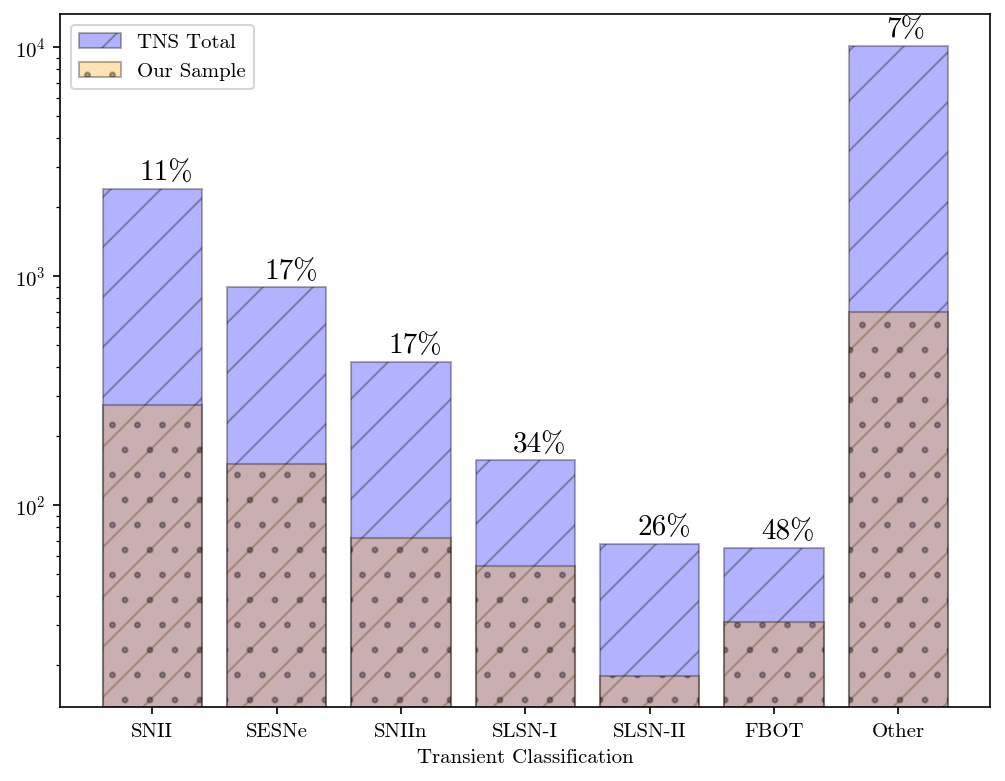

In [2]:
import pandas as pd
from caat.utils import ROOT_DIR
from caat import SNType
import matplotlib.pyplot as plt

from matplotlib import rc
import matplotlib

rc('font', **{'family': 'serif', 'serif': ['cmr10']})
matplotlib.rcParams['axes.unicode_minus'] = False


tns_df = pd.read_csv(ROOT_DIR + '/data/tns_public_objects.csv', header=0)

def count_tns_objs(tns_df, cls):
    snsubtypes_per_type = {
        "SESNe": ['SN Ib', 'SN IIb', "SN Ic", "SN Ic-BL"],
        "SNII": ["SN II", "SN IIP", "SN II-pec"],
        "FBOT": ["SN Ibn", "SN Icn"],
        "SLSN-I": ["SLSN-I"],
        "SLSN-II": ["SLSN-II"],
        "SNIIn": ["SN IIn"],
        "Other": ["SN Ia", "SN Ia-91bg-like", "SN Ia-CSM", "SN Ia-91T-like", "SN Ia-pec", "SN Iax", "TDE"]
    }
    sncollection = SNType(type=cls)
    caat_count = len(sncollection.sne)

    filtered_df = tns_df[(tns_df['creationdate'] < '2025-08-01 00:00:00') & (tns_df['type'].isin(snsubtypes_per_type[cls]))]
    df_count = len(filtered_df)
    return df_count, caat_count

fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
for i, cls in enumerate(["SNII", "SESNe", "SNIIn", "SLSN-I", "SLSN-II", "FBOT", "Other"]):
    df_count, caat_count = count_tns_objs(tns_df, cls)
    print(cls, df_count, caat_count)
    if cls == "SNII":
        ax.bar(cls, [df_count, caat_count], align="center", color=["blue", "orange"], edgecolor='k', alpha=0.3, hatch=['/', '.'], label=["TNS Total", "Our Sample"])
    else:
        ax.bar(cls, [df_count, caat_count], align="center", color=["blue", "orange"], edgecolor='k', alpha=0.3, hatch=['/', '.'])

    ax.text(i-0.1, df_count*1.1, f"{caat_count/df_count*100:.0f}%", fontsize=14)

ax.set_xlabel("Transient Classification")
ax.legend()
ax.set_yscale("log")
# plt.savefig("/Users/craigpellegrino/work/gopreaux_papers/paper_1/figures/objects_per_type.pdf")
plt.show()


### 2. Plot number of data points at each epoch for each transient classification

SNII: 13781
SESNe: 5049
SNIIn: 2997
SLSN-I: 3443
SLSN-II: 760
FBOT: 3297
Other: 17016


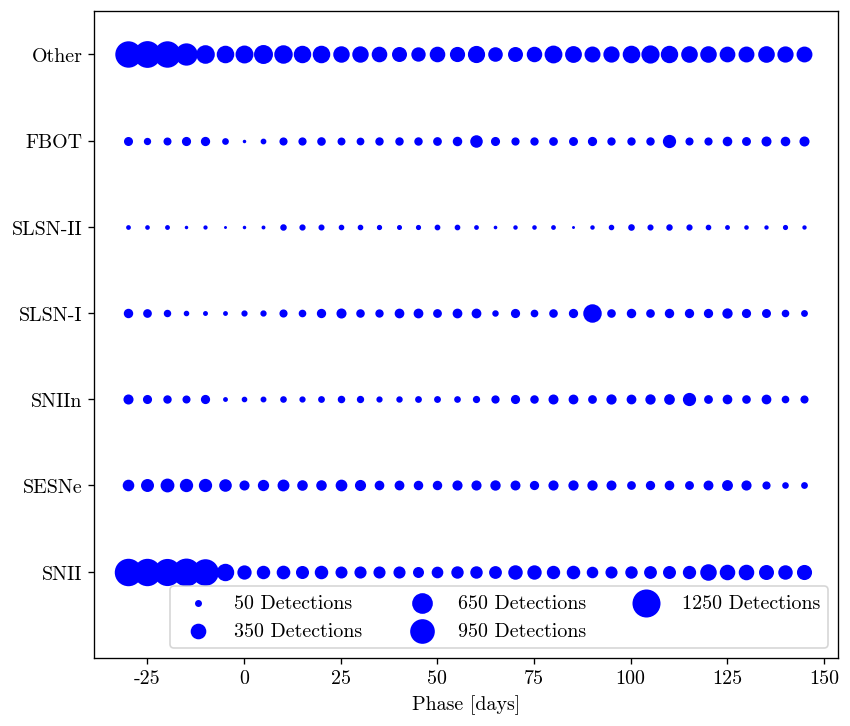

Total number of counts:  46343


In [5]:
import os
import numpy as np
from caat import SNType
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rc
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False
rc('font', **{'family': 'serif', 'serif': ['cmr10']})

def bin_detections_per_class(cls, detections=True):
    sncollection = SNType(type=cls)
    counts = {}
    for sn in sncollection.sne:
        data_cube_filename = os.path.join(
            sn.base_path,
            sn.classification,
            sn.subtype,
            sn.name,
            sn.name + "_datacube_mangled.csv"
        )
        if os.path.exists(data_cube_filename):
            cube = pd.read_csv(data_cube_filename)
            if detections:
                dets = cube[cube["Nondetection"] == False]
            else:
                dets = cube[cube["Nondetection"] == True]
            for phase in np.arange(-30, 150, 5):
                dets_at_phase = dets[abs(dets["Phase"] - phase) < 2.5]
                counts.setdefault(phase, 0)
                counts[phase] += len(dets_at_phase)
    return counts

fig, ax = plt.subplots(figsize=(8, 7), dpi=120)
total_counts = 0
for i, cls in enumerate(["SNII", "SESNe", "SNIIn", "SLSN-I", "SLSN-II", "FBOT", "Other"]):
    total_counts_per_cls = 0
    counts_per_cls = bin_detections_per_class(cls, detections=True)
    for phase, counts in counts_per_cls.items():
        ax.scatter(phase, i, marker='o', color='blue', s=counts/5)
        total_counts += counts
        total_counts_per_cls += counts
    print(f"{cls}: {total_counts_per_cls}")

ax.set_yticks(
    [0, 1, 2, 3, 4, 5, 6],
    ["SNII", "SESNe", "SNIIn", "SLSN-I", "SLSN-II", "FBOT", "Other"],
)
for count in np.arange(50, 1550, 300):
    ax.scatter([], [], color='blue', marker='o', s=count/5, label=f"{count} Detections")
ax.set_ylim(-1., 6.5)
ax.legend(loc=4, ncols=3)
ax.set_xlabel("Phase [days]")
# plt.savefig("/Users/craigpellegrino/work/gopreaux_papers/paper_1/figures/data_per_phase.pdf")
plt.show()
print("Total number of counts: ", total_counts)

### 3. Plot example fit for max

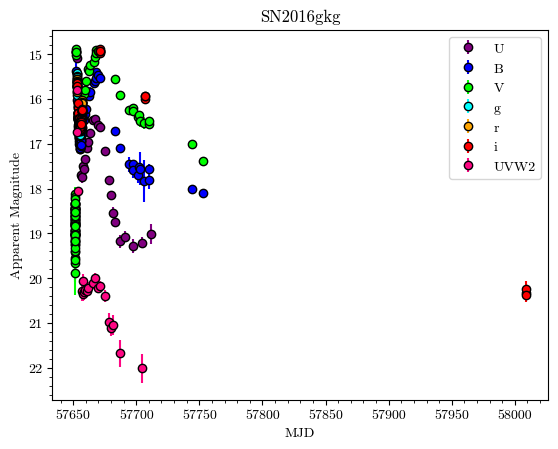

INFO:caat.SN:Data in filters ['G', 'V', 'Clear', 'C', 'B', 'I', 'g', 'r', 'i', 'R', 'clear', 'y', 'z', 'UVW2', 'U']



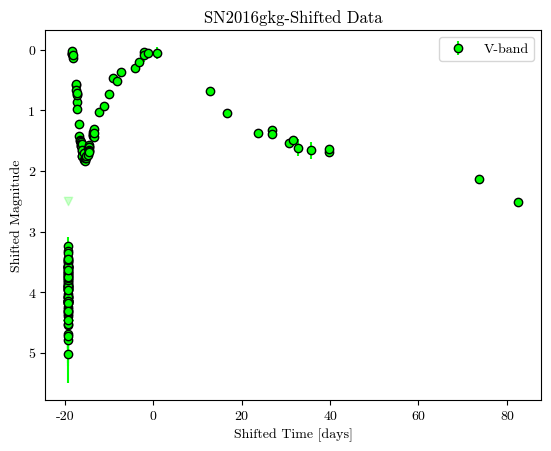

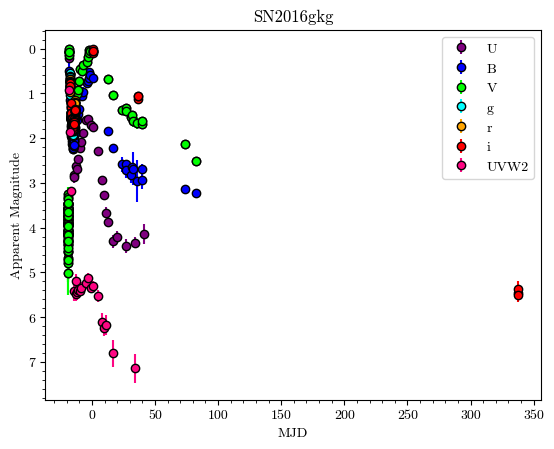

INFO:caat.SN:To save these parameters, rerun with "save_to_caat=True"


In [11]:
from caat import SN

from matplotlib import rc
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False
rc('font', **{'family': 'serif', 'serif': ['cmr10']})

sn = SN(name="SN2016gkg")
sn.interactively_fit_for_max(plot=True)

### 4. Plot warped datacube

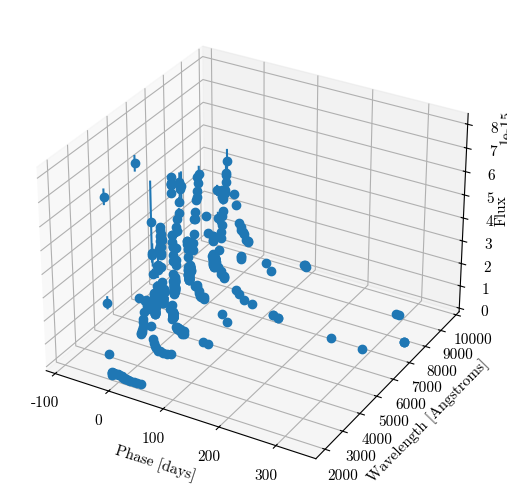

In [64]:
from caat import DataCube, SN
import matplotlib.pyplot as plt

from matplotlib import rc
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False
rc('font', **{'family': 'serif', 'serif': ['cmr10'], 'size': 11})


sn = SN(name="SN2016gkg")
cube = DataCube(sn=sn)
ax = cube.plot_cube()
# ax.set_xlim(-20, 100)
ax.set_xlabel("Phase [days]")
ax.set_ylabel("Wavelength [Angstroms]")
ax.set_zlabel("Flux", rotation=90, labelpad=-4)
plt.tight_layout(pad=0)
# ax.zaxis.labelpad=-4.0
# ax.set_title(" " * 40)
plt.savefig('/Users/craigpellegrino/work/gopreaux_papers/paper_1/figures/datacube.pdf')

### 5. Comparing model prediction to photometry

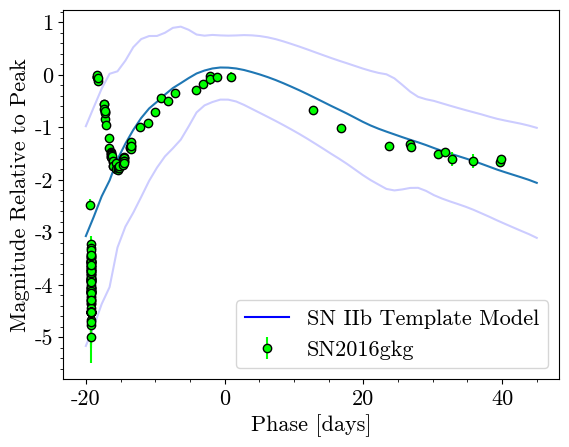

In [12]:
from caat import SNModel, SN
import matplotlib.pyplot as plt

from matplotlib import rc
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False
rc('font', **{'family': 'serif', 'serif': ['cmr10'], 'size': 16})


model = SNModel(
    surface="SESNe_SNIIb_GP_model.fits",
)
model.predict_lightcurve(-20.0, 45.0, 6000, show=False)
gkg = SN(name="SN2016gkg")
model.compare_lightcurve_with_photometry(gkg, filt="V", show=False)
plt.plot([], [], color='blue', label="SN IIb Template Model")
plt.legend()
plt.ylabel("Magnitude Relative to Peak")
plt.xlabel("Phase [days]")
plt.minorticks_on()
plt.title("")
# plt.savefig("/Users/craigpellegrino/work/gopreaux_papers/paper_1/figures/model_compared_to_phot.pdf")
plt.show()

### 6. Simulate fitting light curves to photometry

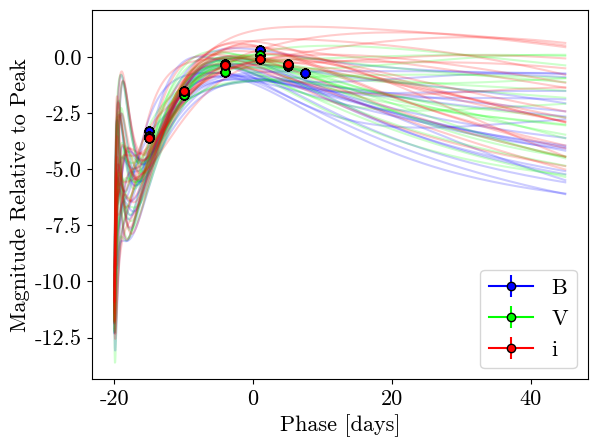

In [ ]:
from caat import SNModel
import matplotlib.pyplot as plt

from matplotlib import rc
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False
rc('font', **{'family': 'serif', 'serif': ['cmr10'], 'size': 16})

model = SNModel(
    surface="SESNe_SNIIb_GP_model.fits",
)

# mock_photometry_values = {
#     "Filter": ["B", "B", "B", "B", "B", "V", "V", "V", "V", "V", "i", "i", "i", "i", "i", "B"],
#     "Phase": [-15.0, -10.0, -4.0, 1.0, 5.0, -15.0, -10.0, -4.0, 1.0, 5.0, -15.0, -10.0, -4.0, 1.0, 5.0, 30.0],
#     "Mag": [-3.3, -1.6, -0.8, 0.1, -0.6, -3.5, -1.7, -0.75, -0.1, -0.5, -3.6, -1.65, -0.4, 0.0, -0.4, -4.0],
#     "MagErr": [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
# }

mock_photometry_values = {
    "Filter": ["B", "B", "B", "B", "B", "V", "V", "V", "V", "V", "i", "i", "i", "i", "i", "B",],
    "Phase": [-15.0, -10.0, -4.0, 1.0, 5.0, -15.0, -10.0, -4.0, 1.0, 5.0, -15.0, -10.0, -4.0, 1.0, 5.0, 7.5,],
    "Mag": [-3.3, -1.6, -0.3, 0.3, -0.4, -3.5, -1.7, -0.65, 0.1, -0.3, -3.6, -1.5, -0.35, -0.1, -0.3, -0.7],
    "MagErr": [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
}

model.fit_photometry(
    photometry=mock_photometry_values, 
    phase_min=-20,
    phase_max=45,
    show=False,
    nsamples=20
)

plt.errorbar([], [], yerr=[], color='blue', mec='k', marker='o', label='B')
plt.errorbar([], [], yerr=[], color='lime', mec='k', marker='o', label='V')
plt.errorbar([], [], yerr=[], color='red', mec='k', marker='o', label='i')
plt.legend()

plt.xlabel("Phase [days]")
plt.ylabel("Magnitude Relative to Peak")
# plt.savefig("/Users/craigpellegrino/work/gopreaux_papers/paper_1/figures/synthetic_lcs.pdf")
plt.show()

### 7. Simulate Photometry Points

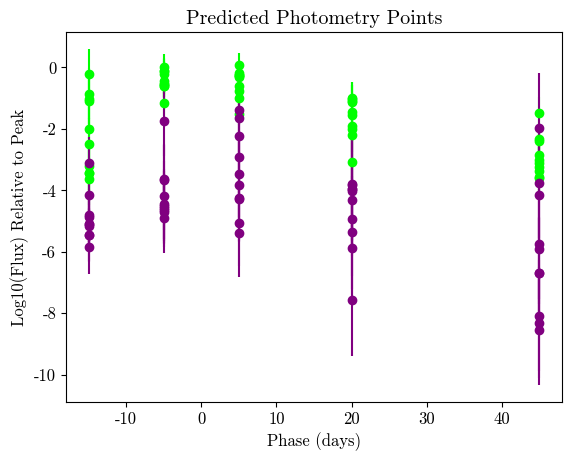

In [2]:
from caat import SNModel
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False
rc('font', **{'family': 'serif', 'serif': ['cmr10'], 'size': 12})

model = SNModel(
    surface="SESNe_SNIIb_GP_model.fits",
)

fig, ax = plt.subplots()

predictions = {'lime': 5000.0, 'purple': 2500.0}
phases = np.asarray([-15.0, -5.0, 5.0, 20.0, 45.0])
for color, wavelength in predictions.items():
    for i in range(10):
        model.predict_photometry_points(
            wavelengths=np.asarray([wavelength] * len(phases)),
            phases=phases,
            show=False,
            color=color,
        )
plt.show()